# HMC

this looks useful https://bjlkeng.io/posts/hamiltonian-monte-carlo/

https://faculty.washington.edu/yenchic/19A_stat535/Lec9_HMC.pdf

https://gregorygundersen.com/blog/2020/07/05/hmc/


![images](images/hmc1Avarsi.jpg)
![images](images/hmc2Avarsi.jpg)

In [1]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install scipy

integration time - decided by type of sampler:
* nuts dynamically determines integration time
* hmc satatically determines integration time

4.981186718527737


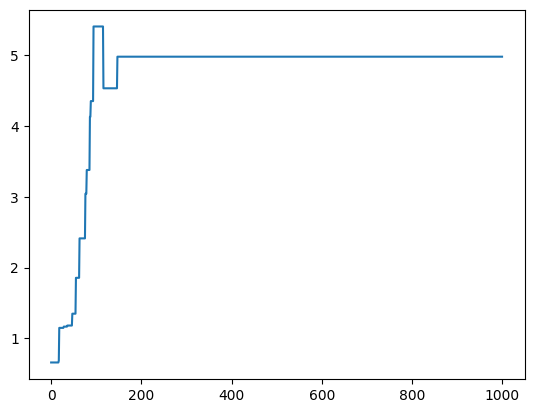

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
def target(x,mu = 5 ,s_d = 1):
    return scipy.stats.norm.pdf(x,loc=mu,scale=s_d)

def target_log(x,mu = 5 ,s_d = 1):
    return scipy.stats.norm.logpdf(x,loc=mu,scale=s_d)

class HMC():
    def __init__(self,n,P,Plog,n_leapfrog_iters, leapfrog_step=0.1):
        self.X = [np.random.randn(1)[0]]
        self.n_iterations = n
        # for higher dims M would be a diag matrix
        # possibly identitiy
        self.M = 1
        self.P = P
        self.Plog = Plog
        self.L = n_leapfrog_iters
        self.step_size = leapfrog_step
        return
    
    def leapfrog(self, v):
        d = -1
        x_leapfrog = [self.X[-1]]
        v_leapfrog = [v]
        for k in range(self.L):
            # 1e-8 is the step size think h tends to infinity
            # in the proof for a derivative being defined 
            # the way that is is
            Ak = scipy.optimize.approx_fprime(
                x_leapfrog[-1], self.Plog, 1e-8)[0]
            v_leapfrog.append(v_leapfrog[-1]+self.step_size*Ak)
            x_leapfrog.append(x_leapfrog[-1]+self.step_size*v_leapfrog[-1]*d)
        return x_leapfrog[-1], v_leapfrog[-1]

    def run_hmc(self):
        for _ in range(self.n_iterations):
            v = np.random.randn(1)[0]
            # U = (v @ M @ v.t) / 2 # for non scalar
            U = (v**2) * self.M + self.P(self.X[-1])
            x_star, v_star = self.leapfrog(v)
            U_star = (v_star**2) * self.M + self.P(x_star)
            a = np.exp(U_star-U)
            unif_val = np.random.rand(1)[0]
            if a < unif_val:
                self.X.append(x_star)
            else:
                self.X.append(self.X[-1])
        return

    def test(self):
        v = np.random.randn(1)[0]
        # U = (v @ M @ v.t) / 2 # for non scalar
        U = (v**2) * self.M + self.P(self.X[-1])
        x_star, v_star = self.leapfrog(v)
        U_star = (v_star**2) * self.M + self.P(x_star)
        a = np.exp(U_star-U)
        unif_val = np.random.rand(1)[0]
        if a < unif_val:
            self.X.append(x_star)
        else:
            self.X.append(self.X[-1])
        return

def plotting_funciton(X):
    t = np.arange(0,len(X),1)
    plt.plot(t,X)
    plt.show()

def main():
    n_iterations = 1000
    hmc = HMC(n_iterations,target, target_log, 5)
    hmc.run_hmc()
    print(hmc.X[-1])
    plotting_funciton(hmc.X)
    
main()

* well from the graph you can see that the step size and other things are probably off i guess that is the whole point of the no u turn sampler
* atleast it is working though, although i am kind of reliant on knowing the probability distribution how would i go about approximating this if i didn't know the pdf, also how would you even get the gradient if that was the case
* need to look at a more complex example or an actual decent toy problem
* I guess if it was model parameters P(X|Y) we could use bayes rule with the observations Y. 
* there are probably some reasonable explanation / example problems online for this